__Feng Nian Tey__<br>
__CS146 Fall 2019__<br>
__Assignment 2__<br>
__Prof. Scheffler__

# Call center data modeling

You are advising a client on the number of call center agents they need to handle their customer support load. We start by modeling the number of phone calls we expect to come into the call center during each hour of the day.

You are provided with a data set of the intervals between phone calls arriving during one day. Each value is a time in minutes indicating the amount of time that passed between receiving two consecutive phone calls.

## Load the Data

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
### First, we load the data set containing durations between calls arriving at the call center during 1 day. 

waiting_times_day = np.loadtxt('call_center.csv')

# To process the data into 24-hour intervals, we first make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

## First Task

1. Compute a 98% posterior confidence interval over the number of calls per minute (the call rate $λ$ ) for each hour of the day — so you will have 24 confidence intervals. Also, compute the posterior mean of $λ$ for each hour of the day.

### Plot histograms of the call wait times for each hour of the day and model a likelihood function for all of them.

* All the histograms will look a lot like an instance of the exponential distribution.
* The exponential distribution has 1 parameter, namely the rate $\lambda.$
* A good initial guess for the rate (called the _maximum likelihood estimate_) is the average of the data.
* Note that the maximum likelihood estimate does not give us any information about how much uncertainty there is in our guess for $\lambda$. This is a common problem.

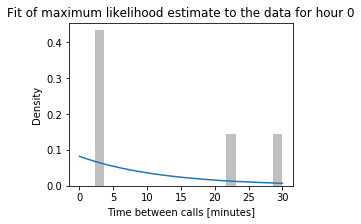

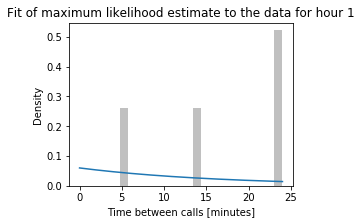

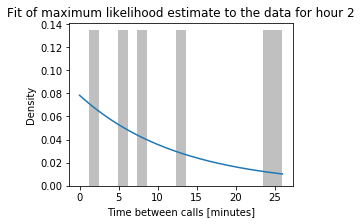

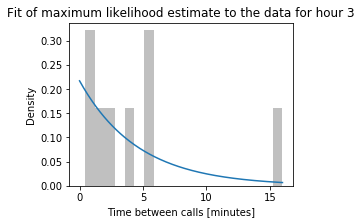

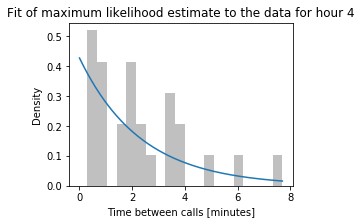

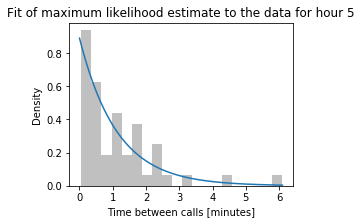

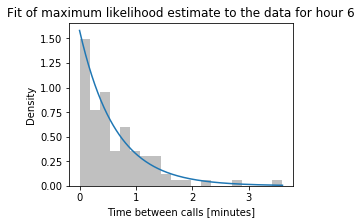

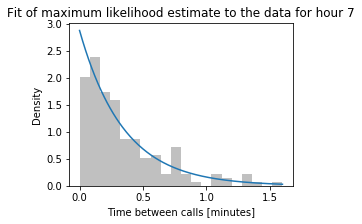

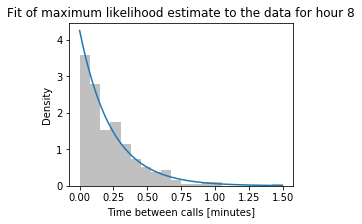

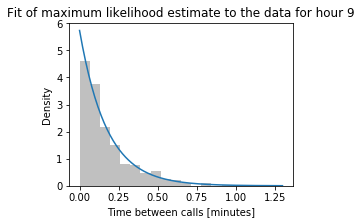

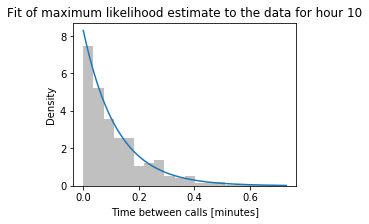

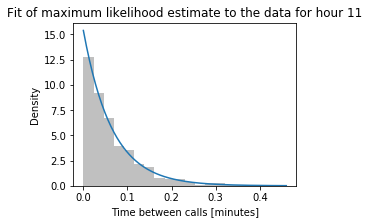

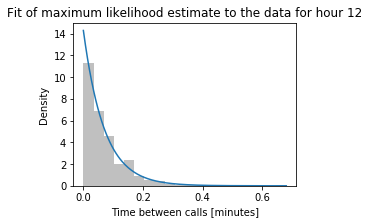

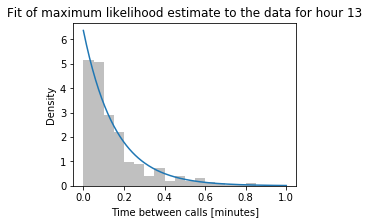

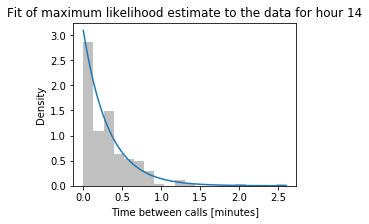

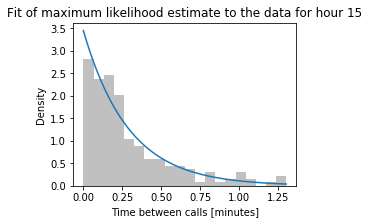

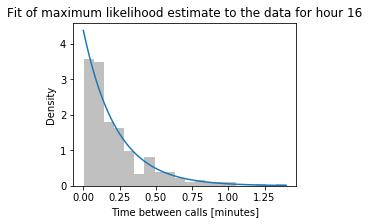

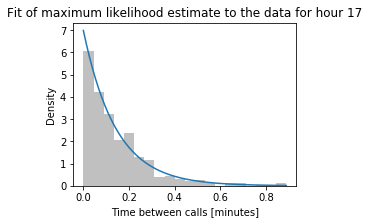

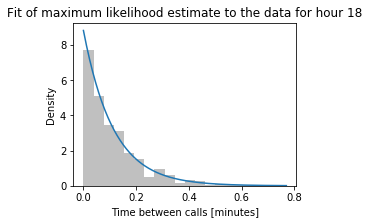

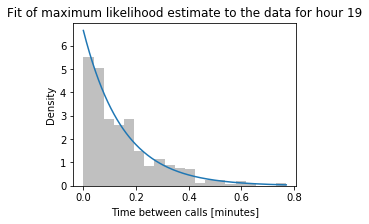

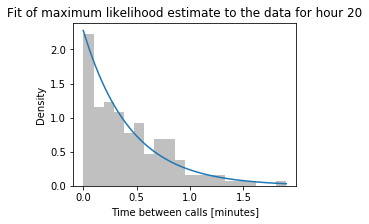

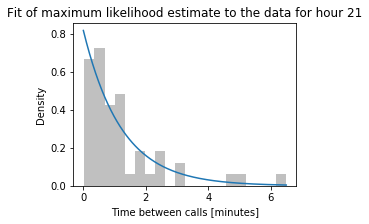

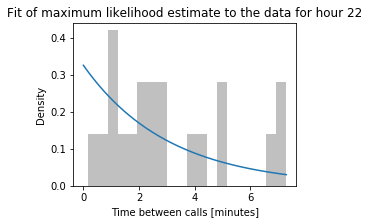

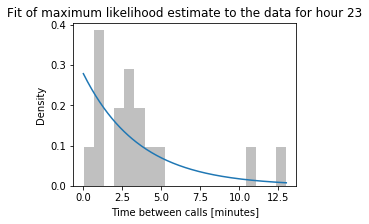

In [51]:
# First, we write a for loop to iterate across all the 24 hours in a day.
# The, we will model an exponential distribution with maximum likelihood fit to the data.

for hour_index in range(0, 24, 1):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    lambda_ = 1 / np.mean(waiting_times_hour)
    distribution = sts.expon(scale=1/lambda_)
    plt.figure(figsize=(4, 3))
    plt.hist(waiting_times_hour, bins=20, density=True, color='#c0c0c0')
    x = np.linspace(0, max(waiting_times_hour), 200)
    y = distribution.pdf(x)
    plt.plot(x, y)
    plt.xlabel('Time between calls [minutes]')
    plt.ylabel('Density')
    plt.title(f'Fit of maximum likelihood estimate to the data for hour {hour_index}')
    plt.show()

### Conduct Bayesian inference to obtain the 98% posterior confidence interval and the posterior mean of $λ$ for each hour of the day.

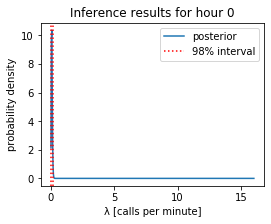

Expected value: λ = 0.10031131211407818 calls per minute
Posterior 98% interval: [0.032, 0.192] calls per minute


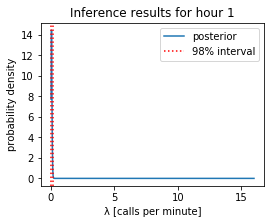

Expected value: λ = 0.07930325349737048 calls per minute
Posterior 98% interval: [0.032, 0.16] calls per minute


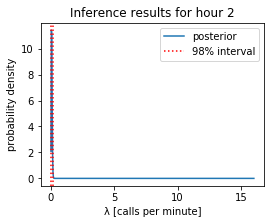

Expected value: λ = 0.09308575728097065 calls per minute
Posterior 98% interval: [0.032, 0.192] calls per minute


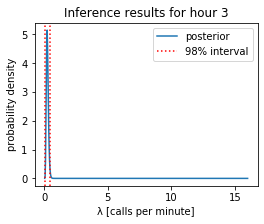

Expected value: λ = 0.24265661257731813 calls per minute
Posterior 98% interval: [0.064, 0.448] calls per minute


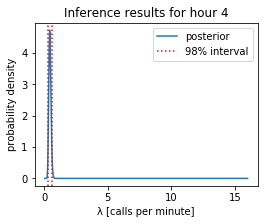

Expected value: λ = 0.4423328964613409 calls per minute
Posterior 98% interval: [0.256, 0.64] calls per minute


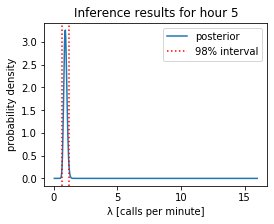

Expected value: λ = 0.9033121445299432 calls per minute
Posterior 98% interval: [0.64, 1.184] calls per minute


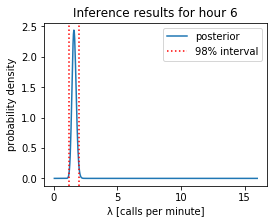

Expected value: λ = 1.5911875564257958 calls per minute
Posterior 98% interval: [1.216, 1.984] calls per minute


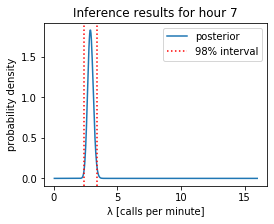

Expected value: λ = 2.881006961605615 calls per minute
Posterior 98% interval: [2.368, 3.392] calls per minute


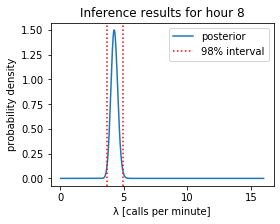

Expected value: λ = 4.256924597345016 calls per minute
Posterior 98% interval: [3.648, 4.896] calls per minute


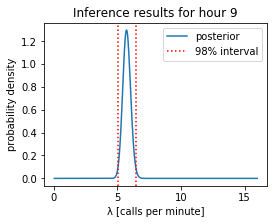

Expected value: λ = 5.728695915357027 calls per minute
Posterior 98% interval: [5.024, 6.464] calls per minute


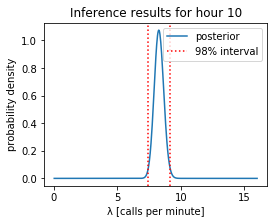

Expected value: λ = 8.2794764772077 calls per minute
Posterior 98% interval: [7.424, 9.152000000000001] calls per minute


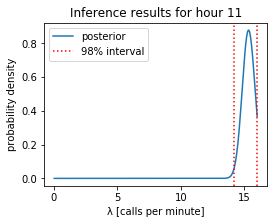

Expected value: λ = 15.24502560059755 calls per minute
Posterior 98% interval: [14.144, 15.968] calls per minute


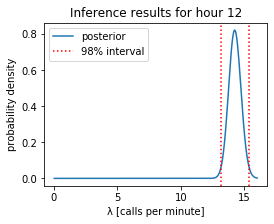

Expected value: λ = 14.250199333236647 calls per minute
Posterior 98% interval: [13.120000000000001, 15.392] calls per minute


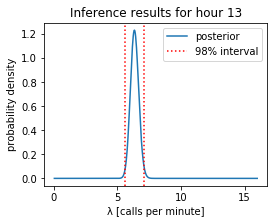

Expected value: λ = 6.349423180600143 calls per minute
Posterior 98% interval: [5.6000000000000005, 7.104] calls per minute


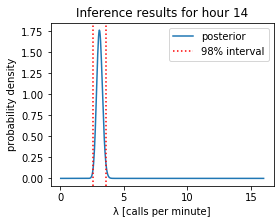

Expected value: λ = 3.094053744378928 calls per minute
Posterior 98% interval: [2.56, 3.616] calls per minute


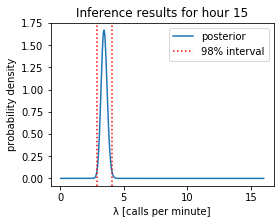

Expected value: λ = 3.452205951304311 calls per minute
Posterior 98% interval: [2.912, 4.032] calls per minute


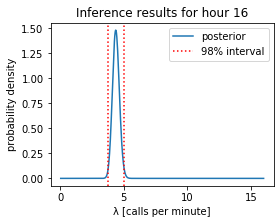

Expected value: λ = 4.379532982528317 calls per minute
Posterior 98% interval: [3.7760000000000002, 5.024] calls per minute


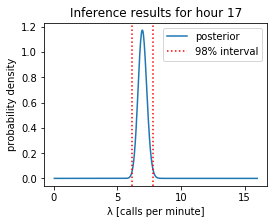

Expected value: λ = 6.972251600671261 calls per minute
Posterior 98% interval: [6.176, 7.776] calls per minute


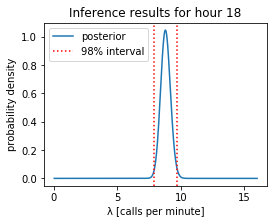

Expected value: λ = 8.797216818562106 calls per minute
Posterior 98% interval: [7.904, 9.696] calls per minute


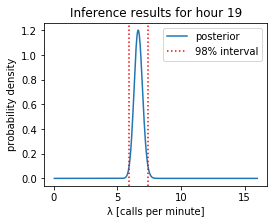

Expected value: λ = 6.6475264322062575 calls per minute
Posterior 98% interval: [5.888, 7.424] calls per minute


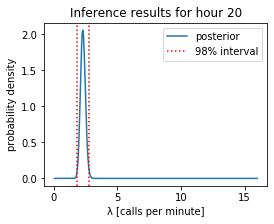

Expected value: λ = 2.285113248887911 calls per minute
Posterior 98% interval: [1.824, 2.7520000000000002] calls per minute


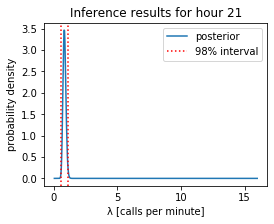

Expected value: λ = 0.8305780503777529 calls per minute
Posterior 98% interval: [0.5760000000000001, 1.12] calls per minute


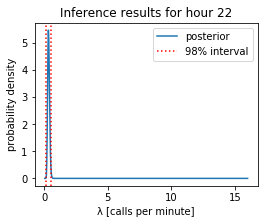

Expected value: λ = 0.340909090906545 calls per minute
Posterior 98% interval: [0.16, 0.512] calls per minute


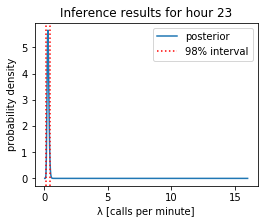

Expected value: λ = 0.2943366174739629 calls per minute
Posterior 98% interval: [0.128, 0.48] calls per minute


In [95]:
# THE LIKELIHOOD FUNCTION
#
# This function takes 2 inputs, namely the parameter (λ) value at which to
# compute the likelihood and a value from the data set. You need to evaluate
# the exponential distribution of the datum given the parameter value.

def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

# THE PRIOR DISTRIBUTION
#
# This function takes 1 input, namely the parameter value (λ) at which to
# compute the prior probability density. You need to evaluate the distribution
# Gamma(λ | α, β).

def prior(lambda_):
    return sts.gamma(1, scale=1/0.25).pdf(lambda_)

# THE POSTERIOR DISTRIBUTION
#
# The function below is provided to help make computing the posterior easier. It
# follows the same pattern as in the previous class, where we multiple the prior
# and the likelihood evaluated at various values of the parameter (λ).
#
# You will see the function uses the logarithms of various distributions. This
# is for numerical reasons. When you multiply lots of likelihood values, the
# result can become very large or very small, causing numerical overflow or
# underflow in Python. Taking logarithms avoids this problem.

def compute_posterior(parameter_values, prior, likelihood, data):
    log_prior = np.log(prior(parameter_values))
    log_likelihood = np.array([
        np.sum(np.log(likelihood(param, data)))
        for param in parameter_values])
    unnormalized_log_posterior = log_prior + log_likelihood
    unnormalized_log_posterior -= max(unnormalized_log_posterior)
    unnormalized_posterior = np.exp(unnormalized_log_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

def compute_percentile(parameter_values, distribution_values, percentile):
    '''
    Compute the parameter value at a particular percentile of the given
    probability distribution values. This function uses the cumulative trapezoid
    integrator in SciPy.

    Inputs:

        parameter_values (array of float) This is the list of parameter values
          at which the probability distribution has been evaluated.

        distribution_values (array of float) This is the list of values of the
          probability density function evaluated at the parameter values above.

        percentile (float) This is the value between 0 and 1 of the percentile
          to compute.

    Returns: (float) The parameter value at the given percentile.
    '''
    cumulative_distribution = sp.integrate.cumtrapz(
        distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return lambdas[percentile_index]

percentiles_list = []
mean_list = []

for hour_index in range(0, 24, 1):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    lambdas = np.linspace(0, 16, 501)[1:] # Here, it was important to define the linspace as 16 because the
                                          # maximum y-value (the call rate) is 15++
    posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_hour)
    percentiles = [compute_percentile(lambdas, posterior, p) for p in [0.01, 0.99]]
    percentiles_list.append(percentiles) # Store all the percentiles in a list to plot the final graph later
    plt.figure(figsize=(4, 3))
    plt.plot(lambdas, posterior, label='posterior')
    plt.axvline(percentiles[0], color='red', linestyle=':', label='98% interval')
    plt.axvline(percentiles[1], color='red', linestyle=':')
    plt.xlabel('λ [calls per minute]')
    plt.ylabel('probability density')
    plt.title(f'Inference results for hour {hour_index}')
    plt.legend()
    plt.show()
    lambda_ = sp.integrate.trapz(posterior * lambdas, lambdas)
    mean_list.append(lambda_) # Store all the means in a list for the final graph
    print('Expected value: λ =', lambda_, 'calls per minute')

    print('Posterior 98% interval:', percentiles, 'calls per minute')

### Second Task
2. Present your results graphically using Matplotlib. Make a plot that looks like the one below. Each dot is at the posterior mean and each line shows a 98% confidence interval for a $λ$. You can use the ``errorbar()`` function in the plotting library to do this.

In [96]:
# Separate the upper and lower bounds from the percentiles list that I created earlier
upper_bound = [percentile[1] for percentile in percentiles_list]
lower_bound = [percentile[0] for percentile in percentiles_list]

# Reformat the data to match the format for the parameters of plt.errorbar
upper_err = [abs(upper_bound[i] - mean_list[i]) for i in range(24)]
lower_err = [abs(lower_bound[i] - mean_list[i]) for i in range(24)]
errors = [lower_err, upper_err]

### Plot the final scatterplot

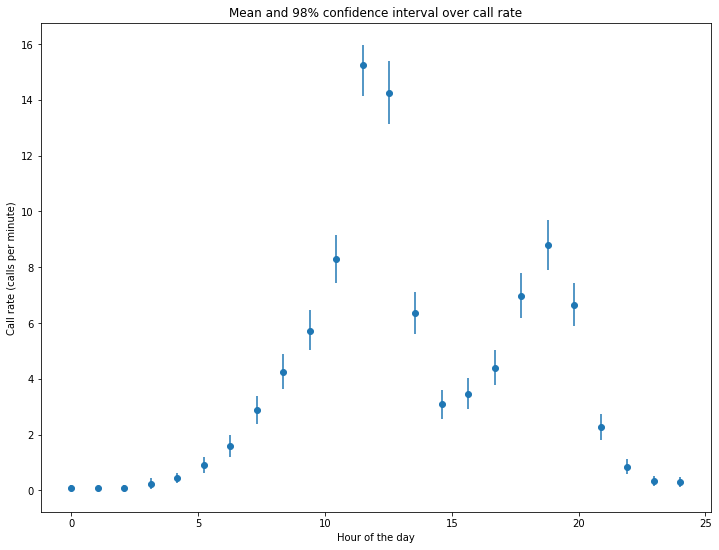

In [102]:
x = np.linspace(0, 24, 24) #defining
plt.figure(figsize=(12, 9))
plt.errorbar(x,mean_list, yerr=errors, fmt='o')
plt.xlabel("Hour of the day")
plt.ylabel("Call rate (calls per minute)")
plt.title("Mean and 98% confidence interval over call rate")
plt.show()

### Third task

3. Write a paragraph (100–200 words) to accompany your plot and present your findings to the client. Carefully summarize how many calls you expect during different parts of the day, and how much uncertainty there is in your estimates. Remember that the client is not an expert in statistics, so make it easy for them to understand. You may also make additional plots to help communicate your results.

As seen from the scatterplot above, we expect for the call rate to vary across the 24-hour period in a day. There is a relatively low call rate in the wee hours of the morning (hours 0 to 5), as well as during the last few hours of a day (hours 21 to 24). The call rate increases exponentially from hours 5 to 13, peaking at hour 12, which makes sense, since that is during the prime working hours of a day, and people tend to call for customer support during that time. Right after lunch break (hour 13), there is a sharp decline in demand for customer support services, all the way till hour 15, where it starts to increase again. This time, the peak is nowhere near our midday peak - the peak at hour 19 is just a little over half of the one we had at noon. Then, right after that, the demand begins to drop again, all the way till the midnight, and the day resets. 

In order to accommodate all incoming call requests while maximizing the utility of each call agent, I recommend the client to do more research into the call data and identify another crucial piece of data - the average call duration. With that, we will be able to make a more informed decision, but for now, I will assume that the average call duration is 1 minute long. We can also split the day into three 8-hour shifts: 

- __Hour 22 to hour 6 on the next day__: This is the "wee hour" period, where call demand is the lowest in the entire day, with the highest call rate being 0.9 calls per minute. Here, we can delegate 1 active agent, with another agent as backup to account for anomalies. 
- __Hour 6 to hour 14__: This is the peak period of the day, where call demand is the highest, with the highest call rate being 15.2 calls per minute. However, we notice that there are only two hours where the call rate exceeds 10 calls per minute (hours 11 and 12). Therefore, we probably only need 10 call agents on standby at all times, but add another 6 more part-time agents during hours 11 and 12.
- __Hour 14 - hour 22__: This is the lower peak period of the day, with the highest call rate being 8.8 calls per minute. Here, to be on the safe side, we can delegate 9 call agents for the whole period. 

This method can definitely be optimized if we can get more understanding about caller behavior and the various attractor basins that might be present within this complex system. Predictive algorithms trained via machine learning can also be implemented to predict caller behavior and determine the specific number of agents require _by the hour_. Nonetheless, this is definitely a good benchmark to start with.

# Stretch Goal

Explain how the ``compute_posterior`` function (reproduced below) from Lesson 2.2 works. We discussed the function briefly in class. For a complete answer you need to address all the points below. You can also add any other information you think is relevant to the techniques used in the function.

In [104]:
def compute_posterior(parameter_values, prior, likelihood, data):
    log_prior = np.log(prior(parameter_values))
    log_likelihood = np.array([
        np.sum(np.log(likelihood(param, data)))
        for param in parameter_values])
    unnormalized_log_posterior = log_prior + log_likelihood 
    unnormalized_log_posterior -= max(unnormalized_log_posterior)
    unnormalized_posterior = np.exp(unnormalized_log_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

### 1. The purpose of the function is to multiply the prior and likelihood passed as input arguments and to return the posterior as output. Explain how the function achieves this purpose using logarithms.

First, this function converts the prior and the likelihood into their logarithmic form with the function ``np.log`` that is part of the numpy library (note that for the likelihood function, we have to take into account the different parameter values that we will define when calling the function - in the example above, the parameter values were defined by ``lambdas = np.linspace(0, 16, 501)[1:]``.

Then, based on the fundamental logarithmic rule  $log(a\times b) = log(a) + log(b)$, we can just add the $log$ of the prior to the $log$ of the likelihood, which gives us the unnormalized $log$ of the posterior. This is executed in line 6 of the code.

Lastly, we have to convert the unnormalized $log$ of the posterior back to the unnormalized posterior, and this is done with the function ``np.exp``.

### 2. What is the purpose of ``np.sum()`` in line 4?

As aforementioned, when we want to calculate the likelihood function, we need to take into account the different parameter values that will be defined when we call the function. Therefore, since we are taking the $log$ of all these likelihood functions, we basically just have to add them all up with the ``np.sum()`` function to get the final likelihood function. Once again, this adheres to the fundamental logarithmic rule $log(a\times b) = log(a) + log(b)$, but since there can be more than 2 parameter values, the rule can be rewritten to:

$log(n_1 \times n_2 \times n_3 \times...\times n_i) = log(n_1) + log(n_2) + log(n_3) +...+ log(n_i)$

where $i$ is the number of parameter values.

### 3. Explain why the maximum of the unnormalized log posterior is subtracted in line 7.

From the other fundamental logarithmic rule of $log(a\div b) = log(a) - log(b)$, we know that the subtraction of the maximum of the unnormalized log posterior is basically the division by the maximum of the unnormalized log posterior. In other words, we are scaling the whole array of unnormalized posteriors uniformly by dividing them by the biggest value amongst them, which happens to be $254.81$ (I obtained this by adding a ``print(max(unnormalized_log_posterior))`` statement between lines 6 and 7 of the code).

### 4. Why do we still have to divided by the area in line 10 even after having subtracted the maximum of the unnormalized log posterior in line 7?

Here, we are dividing the unnormalized posterior by the area to get the normalized posterior. In other words, we are normalizing the posterior curve by dividing all the posterior values by the area under the curve, which results in a normalized posterior curve with an area of 1.

### 5. Create an example where not taking logarithms would cause a problem. Create a prior, likelihood, and data set that fails to produce the correct posterior when we don’t take logs. Show all your code and visualize your results on one or more plots.

Now we know that the use of logarithms is to avoid numerical overflow or underflow in Python, since when you multiply lots of likelihood values, the result can become very large or very small. Therefore, to create an example where not using the logarithmic term will cause a problem, we will have to include likelihood values that are very tiny or very big, so that the product of them will result in an underflow/overflow in Python.

To do that, let's first modify the function to not include logarithmic values:

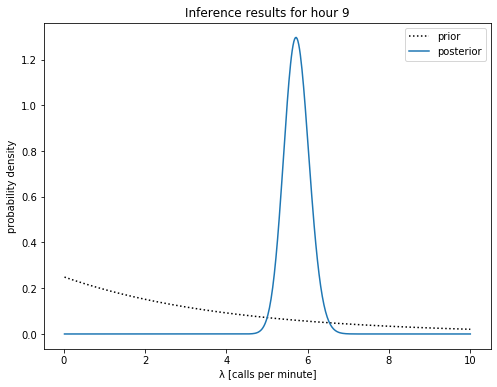

In [135]:
hour_index = 9
waiting_times_hour = waiting_times_per_hour[hour_index]

lambda_ = 1 / np.mean(waiting_times_hour)
distribution = sts.expon(scale=1/lambda_)

def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

def prior(lambda_):
    return sts.gamma(1, scale=1/0.25).pdf(lambda_)

likelihoods = []

def compute_posterior(parameter_values, prior, likelihood, data):
    prior = prior(parameter_values)
    for param in parameter_values:
        likelihoods.append(np.prod(np.array(likelihood(param, data)))) # Here, instead of using np.sum(), we use
                                                                       # np.prod(), cause we are no longer using 
                                                                       # the logarithmic values of the likelihood
    unnormalized_posterior = prior*likelihoods
    unnormalized_posterior /= max(unnormalized_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

lambdas = np.linspace(0, 10, 501)[1:]
posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_hour)

# YOU NEED TO PLOT THE PRIOR AND POSTERIOR ON THE SAME AXES.
plt.figure(figsize=(8, 6))
plt.plot(lambdas, prior(lambdas), color='black', linestyle=':', label='prior')
plt.plot(lambdas, posterior, label='posterior')
plt.xlabel('λ [calls per minute]')
plt.ylabel('probability density')
plt.title(f'Inference results for hour {hour_index}')
plt.legend()
plt.show()

As you can see from the resulting graph above, the example for the 9th hour in this dataset works without using logarithmic terms. This makes sense, since the functions are identical. 

However, if we try to plot the final scatterplot like how we did it earlier...

In [8]:
waiting_times_day = np.loadtxt('call_center.csv')

waiting_times_per_hour = [[] for _ in range(24)]

current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)
    
    
for hour_index in range(0, 24, 1):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    lambda_ = 1 / np.mean(waiting_times_hour)
    distribution = sts.expon(scale=1/lambda_)

def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

def prior(lambda_):
    return sts.gamma(1, scale=1/0.25).pdf(lambda_)

likelihoods = []

def compute_posterior(parameter_values, prior, likelihood, data):
    prior = prior(parameter_values)
    for param in parameter_values:
        likelihoods.append(np.prod(np.array(likelihood(param, data))))
    unnormalized_posterior = prior*likelihoods
    unnormalized_posterior /= max(unnormalized_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

def compute_percentile(parameter_values, distribution_values, percentile):
    cumulative_distribution = sp.integrate.cumtrapz(
        distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return lambdas[percentile_index]

percentiles_list = []
mean_list = []

for hour_index in range(0, 24, 1):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    lambdas = np.linspace(0, 16, 501)[1:] 
    posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_hour)
    percentiles = [compute_percentile(lambdas, posterior, p) for p in [0.01, 0.99]]
    percentiles_list.append(percentiles) 
    lambda_ = sp.integrate.trapz(posterior * lambdas, lambdas)
    mean_list.append(lambda_)

# Separate the upper and lower bounds from the percentiles list that I created earlier
upper_bound = [percentile[1] for percentile in percentiles_list]
lower_bound = [percentile[0] for percentile in percentiles_list]

# Reformat the data to match the format for the parameters of plt.errorbar
upper_err = [abs(upper_bound[i] - mean_list[i]) for i in range(24)]
lower_err = [abs(lower_bound[i] - mean_list[i]) for i in range(24)]
errors = [lower_err, upper_err]

x = np.linspace(0, 24, 24) #defining
plt.figure(figsize=(12, 9))
plt.errorbar(x,mean_list, yerr=errors, fmt='o')
plt.xlabel("Hour of the day")
plt.ylabel("Call rate (calls per minute)")
plt.title("Mean and 98% confidence interval over call rate")
plt.show()

ValueError: operands could not be broadcast together with shapes (500,) (1000,) 

As you can see, the code runs into an error, which is due to the two largest values in the plot (the call rate of $~15$ calls per min for both hours $11$ and $12$) being out of bounds. This is because without the logarithmic term, the likelihood for the data points at hours $11$ and $12$ will have so many multiplications that they eventually disappear, thus leading to an overflor in Python (their values become "``inf``" and it's impossible to plot "``inf``" on a graph). Therefore, we can see how not taking the logarithmic value of the likelihood data can turn out to be a problem. 